<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/Word2Vec_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install psaw

In [ ]:
import pandas as pd
#we will need datetime in order to specify the timeline we need to collect the data
import datetime as dt
#regular expressions will help us clean the text
import re
#gensim
import gensim
#LDA model
from gensim.models import LdaModel
#Use this to setup a dictionay
from gensim.corpora import Dictionary
#This will allow us to get the coherence models
from gensim.models import CoherenceModel
#gensim is a python library used mostly for NLP analysis
#corpora allows us to build a corpus out of different 
#documents
from gensim import corpora
#Defaultdict is a container like dictionaries present in the module collections. 
#Defaultdict is a sub-class of the dict class that returns a dictionary-like object. 
#The functionality of both dictionaries and defualtdict are almost same except for 
#the fact that defualtdict never raises a KeyError. It provides a default value 
#for the key that does not exists.
from collections import defaultdict

#importing ntlk
#we will be using nltk to create bag of words
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
#this recognizes where a sentence starts & ends
#http://www.nltk.org/_modules/nltk/tokenize/punkt.html
nltk.download('punkt')
#Wordnet is important for Lemmatization ==> seel later when we dig into this
#https://www.nltk.org/howto/wordnet.html
nltk.download('wordnet')
#use nltk to get stopwords
nltk.download('stopwords')
#create a stoplist that includes all the english stop words
stopwords_english = stopwords.words('english')
display('here is a subset of the stop words')
display(stopwords_english[0:10])
#now we import the wrapper in order to use the API
# Text Cleaning
import string

from psaw import PushshiftAPI

api = PushshiftAPI()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'here is a subset of the stop words'

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single item. For example, if we are looking through a document and want to do topic modeling, it is important that we do not see each inflection of the word differently. That would confuse the topic modeling algorithm. So, for example, we'd want to see the words "studies" "studied" and "studying" as "study." [1,2]




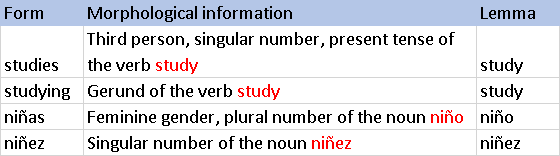

Another simpler way of doing this is called stemming. Stemming algorithms work by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word. This indiscriminate cutting can be successful in some occasions, but not always, and that is why we affirm that this approach presents some limitations.

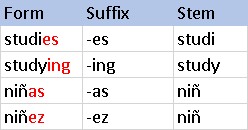

References:

[1] https://en.wikipedia.org/wiki/Lemmatisation

[2] [https://blog.bitext.com what-is-the-difference-between-stemming-and-lemmatization/]()

In [ ]:
#We are using nltk lemmatizer 
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

##Collecting reddit comments from Ex_Foster

In [ ]:
#this function will allow us to find the last day of each month
#for example, there are 31 days in January, but 28 this February
def last_day_of_month(any_day):
    # this will never fail
    # get close to the end of the month for any day, and add 4 days 'over'
    next_month = any_day.replace(day=28) + datetime.timedelta(days=4)
    # subtract the number of remaining 'overage' days to get last day of current month, or said programattically said, the previous day of the first of next month
    return next_month - datetime.timedelta(days=next_month.day)

In [ ]:
import datetime
subredditlist = ['Ex_Foster']
for reddit in subredditlist:
   #collect data between 2019 and 2020
    for y in range(2019,2021):
      #collect data between January and December
      for i in range(1,13):
          file_name= str(reddit)+"_"+str(y)+"_"+str(i)+".json"
          print("starting with the month "+str(i))
          print("for subreddit..."+str(reddit))
          print("setting start epoch...")
          start_epoch=int(dt.datetime(y, i, 1).timestamp())
          print("setting end epoch...")
          last_day = last_day_of_month(datetime.date(y, i, 1))
          print("the last day of the month is...")
          print(last_day.day)
          last_day = int(last_day.day)
          end_epoch = int(dt.datetime(y,i,last_day).timestamp())
          print("setting up the generator...")
          gen = api.search_comments(after=start_epoch, before=end_epoch,subreddit=reddit)
          print("setting up the dataframe...")
          df = pd.DataFrame([obj.d_ for obj in gen])
          print("The number of comments for year "+ str(y)+" and month "+str(i)+" is "+str(len(df.index)))
          df.to_json(file_name)

starting with the month 1
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 1 is 0
starting with the month 2
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
28
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 2 is 0
starting with the month 3
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 3 is 69
starting with the month 4
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
30
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 4 is 233
starting with the month 5
for sub

/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/usr/local/lib/python3.7/dist-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


The number of comments for year 2019 and month 5 is 119
starting with the month 6
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
30
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 6 is 183
starting with the month 7
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 7 is 78
starting with the month 8
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
31
setting up the generator...
setting up the dataframe...
The number of comments for year 2019 and month 8 is 80
starting with the month 9
for subreddit...Ex_Foster
setting start epoch...
setting end epoch...
the last day of the month is...
30
setting up the generator...
setting up the dataframe...
The number of comments for yea

##Cleaning text and creating documents

In [ ]:
#creating smaller dataframe
#we do not need all the columns
df = df[['id','link_id','body','created','author']]

In [ ]:
def first_pass(text): 
    text = str(text)
    #remove newline character code
    text = text.replace('\\n',' ')
    #remove the ampersand character code
    text = text.replace('&amp',' ')
    #character code for a Zero-witdh space, which is a character that acts like a spacebar, except it's invisible
    #https://www.reddit.com/r/OutOfTheLoop/comments/9abjhm/what_does_x200b_mean/
    text = text.replace(';#x200B;',' ')
    #A commonly used character in HTML is the non-breaking space: &nbsp;
    text = text.replace('nbsp',' ')
    
    return text

In [ ]:
df['clean_text'] = df.body.apply(first_pass)

In [ ]:
def second_pass(text): 
    #make string lowercase 
    text = str(text)
    text = text.lower()
    
    #remove links
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    #tokenize
    #create bag of words
    #1-grams 
    tokens = nltk.word_tokenize(text) 
    clean_text = []
    
    #remove stopwords, puncuation, then lemmatize
    for word in tokens:
        if (word not in stopwords_english and word not in string.punctuation): 
            token = wordnet_lemmatizer.lemmatize(word)
            clean_text.append(token)
            
    #remove words of length 3 or smaller        
    clean_text = [token for token in clean_text if len(token) > 3] 
            
    return clean_text      

In [ ]:
df['clean_text'] = df.clean_text.apply(second_pass)

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(df.clean_text, min_count=5,size= 50,workers=3, window =10, sg = 1)

In [ ]:
model.most_similar('parent')

[('said', 0.99928879737854),
 ('stay', 0.9992765784263611),
 ('possible', 0.9992459416389465),
 ('every', 0.9991785287857056),
 ('week', 0.9991408586502075),
 ('abuse', 0.9991047978401184),
 ('reading', 0.9991033673286438),
 ('friend', 0.9990967512130737),
 ('shit', 0.9990841746330261),
 ('book', 0.9990795254707336)]

In [ ]:
model.most_similar('school')

[('talk', 0.9992128014564514),
 ('room', 0.9992107152938843),
 ('alone', 0.9991599321365356),
 ('part', 0.9991534352302551),
 ('called', 0.9991406798362732),
 ('help', 0.9991308450698853),
 ('definitely', 0.9991297721862793),
 ('week', 0.9991133809089661),
 ('worked', 0.9991123676300049),
 ('live', 0.9990778565406799)]

In [ ]:
model.doesnt_match(['sister', 'brother', 'school'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'school'

In [ ]:
model.most_similar(positive=["foster", "woman"], negative=["mother"], topn=3)

KeyError: ignored

In [ ]:
#We will consider all the comments in each of the reddit threads a document
#link_id is used to identify each thread
df_p = df.reset_index().groupby("link_id",as_index=False )['body'].apply(lambda x: ','.join(x))

p_threads = df_p.values

df_p_threads = pd.DataFrame(p_threads)
df_p_threads.rename(columns={0: "comment_thread", 1: "body"},inplace=True)

In [ ]:
df_p_threads['body']

0     Thank you!,I am a ffy and a teacher - keep my ...
1     I loved both respite people I stayed with it w...
2     I was only in foster care from age 16-17 only ...
3     I'm really happy to hear that things were ship...
4     Oh no, I'm so sorry for your loss. I am going ...
5     Honestly, I don't know. I'm not accustomed to ...
6     You are right these are systemic barriers that...
7     I was in a group home when I was first put int...
8     I'm proud of you!! Thats a great accomplishmen...
9     As a teen I read adult books, murder and horro...
10    Someone posted one a while back and it’s still...
11    Me and my husband are not having biological ch...
12    Have you heard of the organization called A Ho...
13    [deleted],I think an it this often. All these ...
14    Each person's location is noted at 15-minute i...
15    Totally agree.,Our lineage is the Ex fosters w...
16    May I ask when this was and how old you are no...
17    I’m an former foster youth myself that’s j

In [ ]:
#creating smaller dataframe
#we do not need all the columns
df = df[['id','link_id','body','created','author']]

In [ ]:
def first_pass(text): 
    text = str(text)
    #remove newline character code
    text = text.replace('\\n',' ')
    #remove the ampersand character code
    text = text.replace('&amp',' ')
    #character code for a Zero-witdh space, which is a character that acts like a spacebar, except it's invisible
    #https://www.reddit.com/r/OutOfTheLoop/comments/9abjhm/what_does_x200b_mean/
    text = text.replace(';#x200B;',' ')
    #A commonly used character in HTML is the non-breaking space: &nbsp;
    text = text.replace('nbsp',' ')
    
    return text

In [ ]:
df_p_threads['clean_text'] = df_p_threads.body.apply(first_pass)

In [ ]:
def second_pass(text): 
    #make string lowercase 
    text = str(text)
    text = text.lower()
    
    #remove links
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    #tokenize
    #create bag of words
    #1-grams 
    tokens = nltk.word_tokenize(text) 
    clean_text = []
    
    #remove stopwords, puncuation, then lemmatize
    for word in tokens:
        if (word not in stopwords_english and word not in string.punctuation): 
            token = wordnet_lemmatizer.lemmatize(word)
            clean_text.append(token)
            
    #remove words of length 3 or smaller        
    clean_text = [token for token in clean_text if len(token) > 3] 
            
    return clean_text      

In [ ]:
df_p_threads['clean_text'] = df_p_threads.clean_text.apply(second_pass)

In [ ]:
df_p_threads.clean_text

0     [thank, teacher, keep, contact, would, love, s...
1     [loved, respite, people, stayed, awesome, fost...
2     [foster, care, 16-17, feel, always, feel, weir...
3     [really, happy, hear, thing, shipped, quickly,...
4     [sorry, loss, going, thing, lost, pupper, resc...
5     [honestly, know, accustomed, family, dynamic, ...
6     [right, systemic, barrier, aged, face, rest, l...
7     [group, home, first, care, home, taking, city,...
8     [proud, thats, great, accomplishment, foster, ...
9     [teen, read, adult, book, murder, horror, alex...
10               [someone, posted, back, still, active]
11    [husband, biological, child, talked, fostering...
12    [heard, organization, called, home, within, co...
13    [deleted, think, often, people, agreed, help, ...
14    [person, location, noted, 15-minute, interval,...
15    [totally, agree., lineage, foster, came, cultu...
16    [sorry, went, life, foster, home, freaking, mo...
17    [former, foster, youth, trying, good, cust

In [ ]:
docs = df_p_threads.clean_text

In [ ]:
docs

0     [thank, teacher, keep, contact, would, love, s...
1     [loved, respite, people, stayed, awesome, fost...
2     [foster, care, 16-17, feel, always, feel, weir...
3     [really, happy, hear, thing, shipped, quickly,...
4     [sorry, loss, going, thing, lost, pupper, resc...
5     [honestly, know, accustomed, family, dynamic, ...
6     [right, systemic, barrier, aged, face, rest, l...
7     [group, home, first, care, home, taking, city,...
8     [proud, thats, great, accomplishment, foster, ...
9     [teen, read, adult, book, murder, horror, alex...
10               [someone, posted, back, still, active]
11    [husband, biological, child, talked, fostering...
12    [heard, organization, called, home, within, co...
13    [deleted, think, often, people, agreed, help, ...
14    [person, location, noted, 15-minute, interval,...
15    [totally, agree., lineage, foster, came, cultu...
16    [sorry, went, life, foster, home, freaking, mo...
17    [former, foster, youth, trying, good, cust

In [ ]:
'''
Gensim Word2Vec Parameters
**********************

min_count = int - Ignores all words with total absolute frequency lower than this - (2, 100)

window = int - The maximum distance between the current and predicted word within a sentence. E.g. window words on the left and window words on the left of our target - (2, 10)

size = int - Dimensionality of the feature vectors. - (50, 300)

sample = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5)

alpha = float - The initial learning rate - (0.01, 0.05)

min_alpha = float - Learning rate will linearly drop to min_alpha as training progresses. To set it: alpha - (min_alpha * epochs) ~ 0.00

negative = int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown. If set to 0, no negative sampling is used. - (5, 20)

workers = int - Use these many worker threads to train the model (=faster training with multicore machines)
'''


In [ ]:
model = Word2Vec(docs, min_count=5,size= 50,workers=3, window =10, sg = 1)

In [ ]:
model.most_similar('adoption')

[('anything', 0.9993597269058228),
 ('coming', 0.9993193745613098),
 ('still', 0.9992997646331787),
 ('honestly', 0.9992932677268982),
 ('mind', 0.9992665648460388),
 ('specific', 0.9992642998695374),
 ('called', 0.9992547631263733),
 ('give', 0.9992499947547913),
 ('post', 0.9992194175720215),
 ('support', 0.9992189407348633)]